<a href="https://colab.research.google.com/github/shoushinkk/-Machine-Learning/blob/main/%D0%9F%D1%80%D0%BE%D0%BA%D0%BE%D0%BF%D0%B5%D0%BD%D0%BA%D0%BE%D0%9A_%D0%9F%D0%A02ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np

# Зчитуємо дані з вказаного URL
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"

# Зчитуємо таблицю в DataFrame
data = pd.read_html(url, header=0)[2]  # Обираємо другий елемент списку, де знаходиться таблиця
df_1 = data.head(5)

# Виводимо перші 5 рядків таблиці
print(df_1)

    Рік В національній валюті В доларах США  \
0  1992              5832,88▲        28,04▼   
1  1993               163533▲        36,03▲   
2  1994              1426343▲        44,99▲   
3  1995              7304000▲        49,53▲   
4  1996               125,23▼        68,45▲   

  Кількість кг хліба[20] на середню зарплату  \
0                                   1015,67▲   
1                                    430,42▼   
2                                    372,76▼   
3                                    201,76▼   
4                                    198,62▼   

  Кількість БігМаків на середню зарплату  
0                                      —  
1                                      —  
2                                      —  
3                                      —  
4                                      —  


In [33]:
#Визначити кількість рядків і стовпчиків

num_rows, num_columns = data.shape
print(f"Кількість рядків: {num_rows}, Кількість стовпчиків: {num_columns}")

Кількість рядків: 32, Кількість стовпчиків: 5


In [34]:
# Визначаємо загальну кількість років та місяців у даних
num_years = len(data['Рік']) - 1  # віднімання 1, оскільки перший стовпець - назва
num_months = num_years*12
print("Загальна кількість років =", num_years)
print("Загальна кількість місяців =", num_months)

Загальна кількість років = 31
Загальна кількість місяців = 372


In [35]:
#Замінити в таблиці "—" на значення  NaN
#Також заміню назви стовпців на зручні
data = data.rename(columns={
    "Рік": "Year",
    "В національній валюті": "Salary in UAH",
    "В доларах США": "Salary in USD",
    "Кількість кг хліба[20] на середню зарплату": "Bread per Salary",
    "Кількість БігМаків на середню зарплату": "BigMacs per Salary"
})
data = data.replace("—", np.nan)
data

,Year,Salary in UAH,Salary in USD,Bread per Salary,BigMacs per Salary
0,1992,"5832,88▲","28,04▼","1015,67▲",NaN
1,1993,163533▲,"36,03▲","430,42▼",NaN
2,1994,1426343▲,"44,99▲","372,76▼",NaN
3,1995,7304000▲,"49,53▲","201,76▼",NaN
4,1996,"125,23▼","68,45▲","198,62▼",NaN
5,1997,"143,09▲","76,86▲","211,13▲",20[21]
6,1998,"152,83▲","62,39▼","177,69▼",н.д.
7,1999,"177,39▲","42,95▼","180,68▲",24▲[22]
8,2000,"231,04▲","42,47▼","117,51▼",н.д.
9,2001,"311,62▲","58,01▲","153,57▲",50▲[23]


In [36]:
# 5. Визначити тип стовпців за допомогою dtypes.
column_types = data.dtypes
print("Типи стовпців:")
print(column_types)

Типи стовпців:
Year                  object
Salary in UAH         object
Salary in USD         object
Bread per Salary      object
BigMacs per Salary    object
dtype: object


In [37]:
#6. Видаліть передостанній і останній стовпчики ( Кількість кгхліба[20] на середнюзарплату,  Кільксть БігМаків на середню зарплату). Далі працюйте з оновленою таблицею.
data = data.drop(columns=["Bread per Salary", "BigMacs per Salary"])
data

,Year,Salary in UAH,Salary in USD
0,1992,"5832,88▲","28,04▼"
1,1993,163533▲,"36,03▲"
2,1994,1426343▲,"44,99▲"
3,1995,7304000▲,"49,53▲"
4,1996,"125,23▼","68,45▲"
5,1997,"143,09▲","76,86▲"
6,1998,"152,83▲","62,39▼"
7,1999,"177,39▲","42,95▼"
8,2000,"231,04▲","42,47▼"
9,2001,"311,62▲","58,01▲"


In [41]:
#7. Замінити тип нечислових даних на числові.
data['Salary in UAH'] = data['Salary in UAH'].str.replace('[^0-9.]', '', regex=True).astype(float)
data['Salary in USD'] = data['Salary in USD'].str.replace('[^0-9.]', '', regex=True).astype(float)
data

,Year,Salary in UAH,Salary in USD
0,1992,583288.0,2804.0
1,1993,163533.0,3603.0
2,1994,1426343.0,4499.0
3,1995,7304000.0,4953.0
4,1996,12523.0,6845.0
5,1997,14309.0,7686.0
6,1998,15283.0,6239.0
7,1999,17739.0,4295.0
8,2000,23104.0,4247.0
9,2001,31162.0,5801.0


In [42]:
data.dtypes

Year              object
Salary in UAH    float64
Salary in USD    float64
dtype: object

In [46]:
#8.Порахуйте частку пропусків в кожній колонці (за допомогою методів isnull , sum, len)
missing_percentage = (data.isnull().sum() / len(data)) * 100
missing_data = pd.DataFrame({
    'Column Name': data.columns,
    'Missing Count': data.isnull().sum(),
    'Missing Percentage': missing_percentage
})

print(missing_data)

                 Column Name  Missing Count  Missing Percentage
Year                    Year              0                 0.0
Salary in UAH  Salary in UAH              0                 0.0
Salary in USD  Salary in USD              0                 0.0


In [47]:
#9.Замініть всі пропущені значення на середні значення по (стовпцю).
# Заміна пропущених значень на середні значення по кожному стовпцю
data_filled = data.fillna(data.mean())

# Виводимо оновлений DataFrame
print(data_filled)

     Year  Salary in UAH  Salary in USD
0    1992       583288.0         2804.0
1    1993       163533.0         3603.0
2    1994      1426343.0         4499.0
3    1995      7304000.0         4953.0
4    1996        12523.0         6845.0
5    1997        14309.0         7686.0
6    1998        15283.0         6239.0
7    1999        17739.0         4295.0
8    2000        23104.0         4247.0
9    2001        31162.0         5801.0
10   2002        37598.0         7059.0
11   2003        46258.0         8674.0
12   2004        59053.0        11102.0
13   2005        80614.0        15730.0
14   2006       104288.0        20651.0
15   2007       135275.0        26787.0
16   2008       180892.0        34343.0
17   2009       190925.0        24505.0
18   2010       224675.0        28312.0
19   2011       263917.0        33124.0
20   2012       303192.0        37942.0
21   2013       327382.0        40959.0
22   2014       347475.0        29232.0
23   2015       420733.0        16260.0


<ipython-input-47-efb6cdc89594>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_filled = data.fillna(data.mean())


In [51]:
#10.Знайдіть рік з найвищою зарплатою в Україні в грн і вкажіть цю зарплату.
# Знаходимо рік з найвищою зарплатою в гривнях
max_salary_year = data['Salary in UAH'].idxmax()
max_salary_value = data.loc[max_salary_year, 'Salary in UAH']

# Виводимо рік та зарплату
print(f"Рік {max_salary_year} має найвищу зарплату в Україні в гривнях: {max_salary_value} грн")




Рік 3 має найвищу зарплату в Україні в гривнях: 7304000.0 грн


In [52]:
#11.Знайдіть рік з мінімальною  зарплатою в Україні в дол. США і вкажіть цю зарплату.
# Знаходимо рік з мінімальною зарплатою в доларах США
min_salary_usd_year = data['Salary in USD'].idxmin()
min_salary_usd_value = data.loc[min_salary_usd_year, 'Salary in USD']

# Виводимо рік та зарплату в доларах США
print(f"Рік {min_salary_usd_year} має мінімальну зарплату в Україні в доларах США: {min_salary_usd_value} USD")


Рік 0 має мінімальну зарплату в Україні в доларах США: 2804.0 USD


In [53]:
#12. Виведіть роки, коли зарплата в грн була вище середньої
# Знаходимо середнє значення зарплати в гривнях
average_salary_uah = data['Salary in UAH'].mean()

# Вибираємо роки, коли зарплата в гривнях була вище середньої
years_above_average = data[data['Salary in UAH'] > average_salary_uah]['Year']

# Виводимо роки
print("Роки, коли зарплата в гривнях була вище середньої:")
print(years_above_average)


Роки, коли зарплата в гривнях була вище середньої:
2      1994
3      1995
25     2017
26     2018
27     2019
28     2020
29     2021
30    2022*
31    2023*
Name: Year, dtype: object


In [54]:
#13.Порівняйте  зарплату  в грн за останні два доступних роки.
# Отримуємо останні два доступних роки
last_two_years_data = data.iloc[-2:]

# Виводимо дані за останні два роки та порівнюємо зарплату в гривнях
if len(last_two_years_data) >= 2:
    year_1 = last_two_years_data.iloc[-2]['Year']
    year_2 = last_two_years_data.iloc[-1]['Year']
    salary_1 = last_two_years_data.iloc[-2]['Salary in UAH']
    salary_2 = last_two_years_data.iloc[-1]['Salary in UAH']

    if salary_1 > salary_2:
        print(f"Зарплата в гривнях була вище в {year_1} ніж у {year_2}")
    elif salary_2 > salary_1:
        print(f"Зарплата в гривнях була вище в {year_2} ніж у {year_1}")
    else:
        print(f"Зарплата в гривнях була однаковою в {year_1} та {year_2}")
else:
    print("Недостатньо даних для порівняння.")


Зарплата в гривнях була вище в 2022* ніж у 2023*


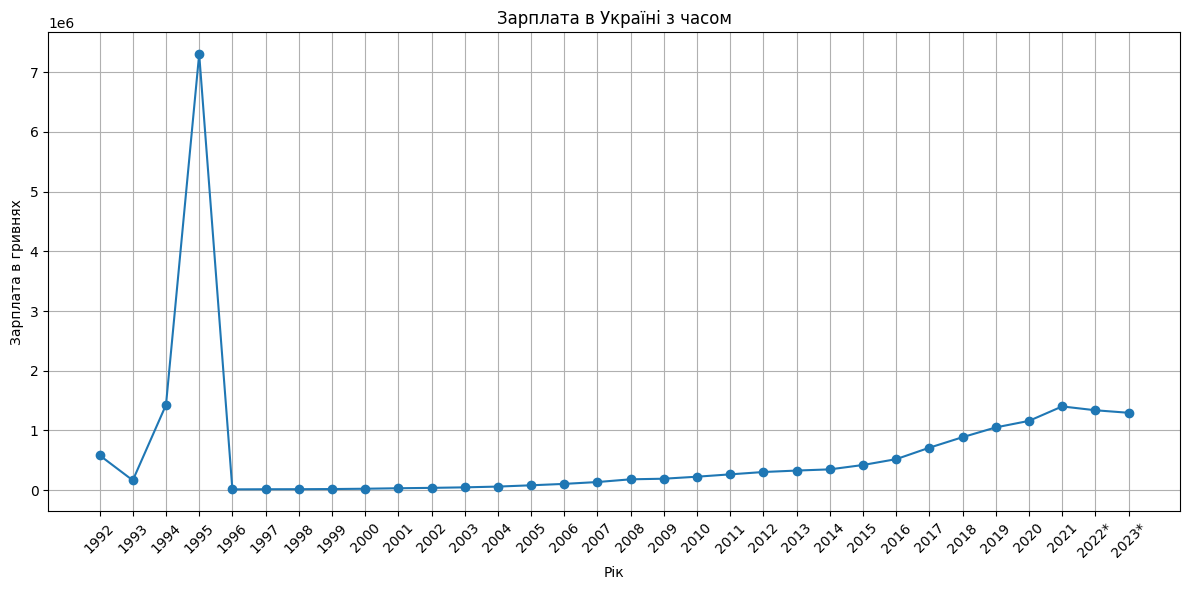

In [55]:
#14.Створіть графік, що відображає  зарплату в Україні з часом (за роками).
import matplotlib.pyplot as plt

# Встановлюємо рік як індекс для DataFrame, якщо він ще не є індексом
data.set_index('Year', inplace=True)

# Створюємо графік зарплати в Україні з часом
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Salary in UAH'], marker='o', linestyle='-')
plt.title('Зарплата в Україні з часом')
plt.xlabel('Рік')
plt.ylabel('Зарплата в гривнях')
plt.grid(True)
plt.xticks(rotation=45)  # Обертання підписів на вісі x для зручності
plt.tight_layout()

# Показуємо графік
plt.show()

In [56]:
#15.Видаліть останній рік з таблиці та виведіть оновлену таблицю.
# Видаляємо останній рік з таблиці
data = data.iloc[:-1]

# Виводимо оновлену таблицю
print(data)

       Salary in UAH  Salary in USD
Year                               
1992        583288.0         2804.0
1993        163533.0         3603.0
1994       1426343.0         4499.0
1995       7304000.0         4953.0
1996         12523.0         6845.0
1997         14309.0         7686.0
1998         15283.0         6239.0
1999         17739.0         4295.0
2000         23104.0         4247.0
2001         31162.0         5801.0
2002         37598.0         7059.0
2003         46258.0         8674.0
2004         59053.0        11102.0
2005         80614.0        15730.0
2006        104288.0        20651.0
2007        135275.0        26787.0
2008        180892.0        34343.0
2009        190925.0        24505.0
2010        224675.0        28312.0
2011        263917.0        33124.0
2012        303192.0        37942.0
2013        327382.0        40959.0
2014        347475.0        29232.0
2015        420733.0        16260.0
2016        518733.0        20302.0
2017        710542.0        

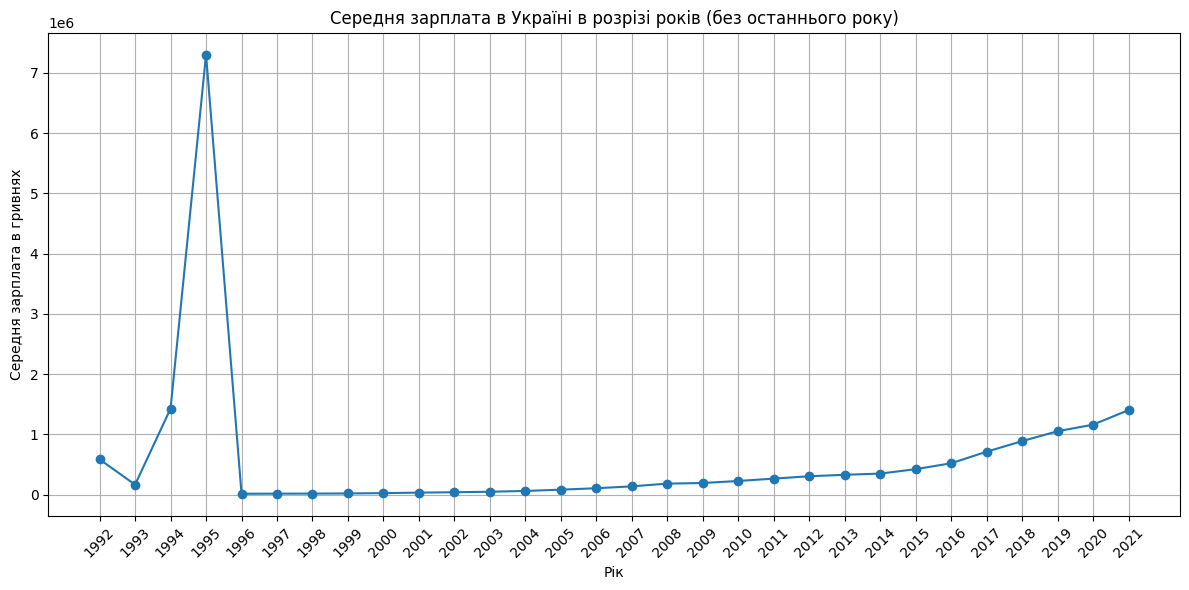

In [57]:
#16.Побудуйте графік, що відображає середню зарплату в Україні в розрізі років без останнього року.
import matplotlib.pyplot as plt

# Видаляємо останній рік з таблиці
data_without_last_year = data.iloc[:-1]

# Групуємо дані за роками і обчислюємо середню зарплату
average_salary_by_year = data_without_last_year.groupby('Year')['Salary in UAH'].mean()

# Створюємо графік середньої зарплати в розрізі років
plt.figure(figsize=(12, 6))
plt.plot(average_salary_by_year.index, average_salary_by_year.values, marker='o', linestyle='-')
plt.title('Середня зарплата в Україні в розрізі років (без останнього року)')
plt.xlabel('Рік')
plt.ylabel('Середня зарплата в гривнях')
plt.grid(True)
plt.xticks(rotation=45)  # Обертання підписів на вісі x для зручності
plt.tight_layout()

# Показуємо графік
plt.show()


In [58]:
#17.Обчисліть зарплату за останні два роки і порівняйте її із зарплатою за останні 5 років. Вкажіть, чи є різниця, і в якому напрямку.
# Отримуємо дані за останні два роки
last_two_years_data = data.iloc[-2:]

# Отримуємо дані за останні 5 років
last_five_years_data = data.iloc[-5:]

# Обчислюємо середню зарплату за останні два роки
average_salary_last_two_years = last_two_years_data['Salary in UAH'].mean()

# Обчислюємо середню зарплату за останні 5 років
average_salary_last_five_years = last_five_years_data['Salary in UAH'].mean()

# Порівнюємо середні значення зарплат
if average_salary_last_two_years > average_salary_last_five_years:
    print("Середня зарплата за останні два роки вища ніж за останні 5 років.")
    print(f"Різниця становить {average_salary_last_two_years - average_salary_last_five_years:.2f} грн")
elif average_salary_last_two_years < average_salary_last_five_years:
    print("Середня зарплата за останні два роки менша ніж за останні 5 років.")
    print(f"Різниця становить {average_salary_last_five_years - average_salary_last_two_years:.2f} грн")
else:
    print("Середня зарплата за останні два роки дорівнює середній зарплаті за останні 5 років.")


Середня зарплата за останні два роки вища ніж за останні 5 років.
Різниця становить 202466.70 грн
